In [1]:
from rslaser import cavity
import matplotlib.pyplot as plt
import numpy as np

# Cavity propagation notebook

This notebook propagates a wavefront through an optical cavity. It demonstrates the use of the cavity.py 
code.
The initial wavefront is a Hermite-Gaussian mode located at the center of a cavity
of length L_cav. There is a crystal located at the center of the cavity of length L_cryst. 
The wavefront is propagated through the crystal and then to the end of the cavity.

In [2]:
# Define Cavity length
L_cav = 2 #Length of cavity [m]

# Define right and left mirror focal lengths
df = 1 #Focal length difference from confocal case [m]
dfR = df
dfL = df
f=L_cav/4+df #focal length

lens_left_focal_length = f
lens_right_focal_length = f

#Define Crystal parameters
L_cryst = 0.4 #Length of crystal [m]
n0=1.5 #index of refraction on axis
n2=0.1 #radial variation of index of refraction: n(r) = n0 - 0.5 n2 r^2
drift_right_length=L_cav/2-L_cryst/2
drift_left_length=drift_right_length

#Define parameters for laser pulse starting at center of crystal
wavefrontEnergy = 1.55 #Wavefront Energy [eV]. 1.55 eV is 800 nm wavelength
lam = 1239.8*1e-9/wavefrontEnergy # convert energy [eV] to wavelength [m]
print('lam = %1.9f m' % lam)

L_eff = L_cav+(1/n0 - 1)*L_cryst #Define effective length as path length reduced by index of refraction n0
print("L_eff = %f m" % L_eff)
beta0 = np.sqrt(L_eff*f-L_eff**2/4)
print("beta0 = %f m" % beta0)
sigx0 = np.sqrt(lam*beta0/4/np.pi)
print("sigx0 = %f m" % sigx0)
sigrW = sigx0

nslice=11
sig_s=0.1 #rms length of Gaussian laser pulse [m]

lam = 0.000000800 m
L_eff = 1.866667 m
beta0 = 1.388844 m
sigx0 = 0.000297 m


In [3]:
#create laser cavity
lc = cavity.LaserCavity(nslice=nslice,L_half_cryst=L_cryst/2, 
                        drift_right_length=drift_right_length,drift_left_length=drift_left_length, 
                        lens_left_focal_length=lens_left_focal_length, 
                        lens_right_focal_length=lens_right_focal_length,n0=n0,n2=n2,sigrW=sigx0)

#output initial parameters
(lpsxvals,lpsyvals,svals) = lc.laser_pulse.rmsvals()
(ivals,svals) = lc.laser_pulse.intensity_vals()

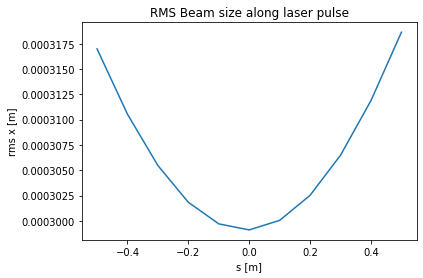

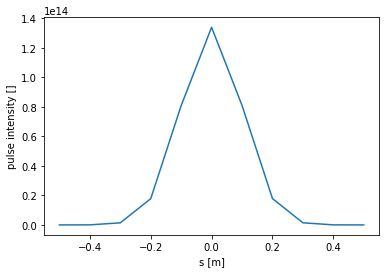

In [4]:
#Plot rms values along laser pulse
plt.plot(svals,lpsyvals)
plt.xlabel('s [m]')
plt.ylabel('rms x [m]')
plt.title('RMS Beam size along laser pulse')
plt.show()

#Plot pulse intensity along laser pulse
plt.plot(svals,ivals)
plt.ylabel('pulse intensity []')
plt.xlabel('s [m]')
plt.show()

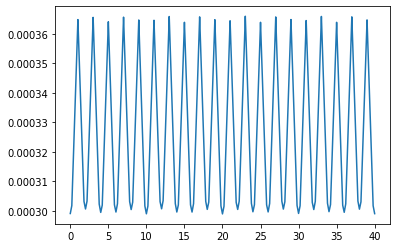

In [5]:
(svals, sxvals, syvals) = lc.propagate(num_cycles=10)

fig, ax = plt.subplots()
ax.plot(svals, sxvals)
plt.show()

In [6]:
#get final laser pulse rms values and intensity values along pulse
(lpsxvals,lpsyvals,svals) = lc.laser_pulse.rmsvals()
(ivals,svals) = lc.laser_pulse.intensity_vals()

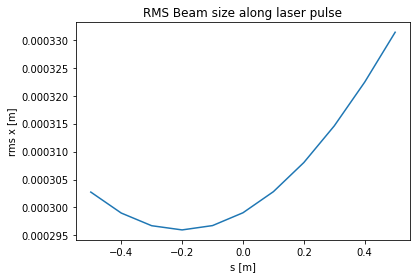

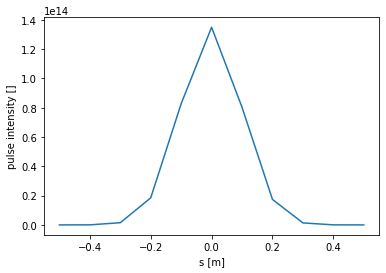

In [7]:
#Plot rms values along laser pulse
plt.plot(svals,lpsyvals)
plt.xlabel('s [m]')
plt.ylabel('rms x [m]')
plt.title('RMS Beam size along laser pulse')
plt.show()

#Plot pulse intensity along laser pulse
plt.plot(svals,ivals)
plt.ylabel('pulse intensity []')
plt.xlabel('s [m]')
plt.show()